# Problem set 2: Descriptive economics

**Learning goals:**

- Using basic `pandas` DataFrame operations
- Clean and structure data
- Download real economic datasets using an API
- Merge and join data sets
- Compute summary statistics

**Table of contents**<a id='toc0_'></a>    
- 1. [Basic pandas](#toc1_)    
  - 1.1. [Dataframe](#toc1_1_)    
  - 1.2. [New variable](#toc1_2_)    
  - 1.3. [Indexing](#toc1_3_)    
  - 1.4. [Changing variables](#toc1_4_)    
  - 1.5. [Dropping observations and columns](#toc1_5_)    
  - 1.6. [Renaming](#toc1_6_)    
  - 1.7. [Income distribution](#toc1_7_)    
- 2. [National account identity](#toc2_)    
  - 2.1. [Download](#toc2_1_)    
  - 2.2. [Merge](#toc2_2_)    
  - 2.3. [Split-apply-combine-plot](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [110]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

from dstapi import DstApi

## 1. <a id='toc1_'></a>[Basic pandas](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Dataframe](#toc0_)

Modify the code below such that *income* and *consumption* are variables in the *df* DataFrame.

In [111]:

np.random.seed(1999)

N = 100
mydata = {}
mydata['id'] = range(N)
mydata['income'] = np.exp(np.random.normal(size=N))
mydata['consumption'] = np.sqrt(mydata['income'])

df = pd.DataFrame(mydata)
df.head(5) #toppen af listen 
#df.tail(3) #bunden af listen 

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712


In [112]:
display(df)

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712
...,...,...,...
95,95,0.201856,0.449284
96,96,2.368034,1.538842
97,97,2.389874,1.545922
98,98,1.488635,1.220096


### 1.2. <a id='toc1_2_'></a>[New variable](#toc0_)

Create a new variable *ratio* which is the ratio of consumption to income.

In [113]:
# write your code here

df['ratio'] = df['consumption']/df['income'] #tilføjer den nye variable
df.head(5) #printer først rækker 


,id,income,consumption,ratio
0,0,0.727981,0.853218,1.172033
1,1,1.997831,1.413447,0.707490
2,2,0.276823,0.526140,1.900636
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513


### 1.3. <a id='toc1_3_'></a>[Indexing](#toc0_)

**Question a:** Select everybody: with an income above 1.

In [114]:
# write your code here
df[df['income']>1].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
6,6,2.574032,1.604379,0.623294
7,7,2.475478,1.573365,0.635580


**Question b:** Select everybody with an income *above* 1 and a ratio *above* 0.7.

In [115]:
# write your code here
df[(df['income']>1) & (df['ratio']>0.7)].head()

,id,income,consumption,ratio
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
11,11,2.031708,1.425380,0.701567
18,18,1.280235,1.131475,0.883802


### 1.4. <a id='toc1_4_'></a>[Changing variables](#toc0_)

**Question a:** Set consumption equal to 0.5 if income is less than 0.5.

In [116]:
# write your code here
df.loc[df['income'] < 0.5, 'consumption'] = 0.5
df['consumption'].mean() # <- compare with answer

np.float64(1.075479712048503)

**Question b:** Set consumption equal to income if income is less than 0.5.

In [117]:
# write your code here
df.loc[df['income'] < 0.5, 'consumption'] = df.loc[df['income'] < 0.5, 'income']
df['consumption'].mean() # <- compare with answer

np.float64(1.0337728690050054)

### 1.5. <a id='toc1_5_'></a>[Dropping observations and columns](#toc0_)

Drop the *ratio* variable and all rows with an income above 1.5. After this, also drop the first 5 rows.

In [118]:
print(f'before: {df.shape[0]} observations, {df.shape[1]} variables')

df = df.drop(columns=['ratio']) #dropper ratio kolonnen 
df = df[df['income'] <= 1.5] # dropper rækker med høj indkomst
df = df.iloc[5:] # dropper de første rækker

print(f'after: {df.shape[0]} observations, {df.shape[1]} variables')

before: 100 observations, 4 variables
after: 65 observations, 3 variables


### 1.6. <a id='toc1_6_'></a>[Renaming](#toc0_)

Rename *consumption* to *cons* and *income* to *inc*.

In [119]:
df = df.rename(columns={'consumption': 'cons', 'income' : 'inc'})
df.head()

,id,inc,cons
8,8,0.582074,0.762938
10,10,0.932044,0.965424
12,12,0.356952,0.356952
13,13,0.379825,0.379825
16,16,0.700896,0.837195


In [120]:
N = 100
mydata = {}
mydata['id'] = range(N)
mydata['income'] = np.exp(np.random.normal(size=N))
mydata['consumption'] = np.sqrt(mydata['income'])

df_true = pd.DataFrame(mydata)

df_true = df_true.rename(columns={'income':'inc','consumption':'con'})
df_true.head()

,id,inc,con
0,0,0.599145,0.774044
1,1,0.469167,0.684957
2,2,1.435292,1.198037
3,3,2.504716,1.582629
4,4,0.156667,0.395811


### 1.7. <a id='toc1_7_'></a>[Income distribution](#toc0_)

Compute the share of income for each decile of the income distribution using the code below as a starting point.

In [121]:


deciles = df['inc'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) #opretter deciler


bins = [-np.inf] + deciles.tolist() + [np.inf] #liste over grænser for indkomstintervallerne, som starter i minus uendelig til uendelig 
labels = [f'D{i}' for i in range(1, 11)] #navngivningen 

df['decile'] = pd.cut(
    df['inc'],
    bins=bins,
    labels=labels,
)

income_shares = df.groupby('decile', observed=True)['inc'].sum() / df['inc'].sum()
display(income_shares)

quartile = df['inc'].quantile([0.25, 0.5, 0.75])

bins = [-np.inf] + quartile.tolist() + [np.inf] #liste over grænser for indkomstintervallerne 
labels = [f'Q{i}' for i in range(1, 5)] #navngivningen 

df['quartile'] = pd.cut(
    df['inc'],
    bins=bins,
    labels=labels,
)

income_shares_v2 = df.groupby('quartile', observed=True)['inc'].sum() / df['inc'].sum()
display(income_shares_v2)

# fra Jeppes kode: deciles = df_true.quantile([0.1 * i for i in range(1, 10)])

decile
D1     0.024775
D2     0.039289
D3     0.061514
D4     0.063729
D5     0.089852
D6     0.098559
D7     0.114818
D8     0.148799
D9     0.149963
D10    0.208702
Name: inc, dtype: float64

quartile
Q1    0.097963
Q2    0.181196
Q3    0.294268
Q4    0.426573
Name: inc, dtype: float64

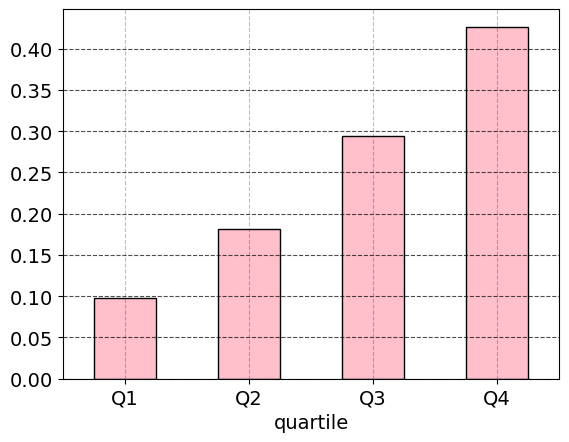

In [126]:
#laver histogrammer 
import matplotlib.pyplot as plt

income_shares_v2.plot(kind='bar', color='pink', edgecolor='black')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## 2. <a id='toc2_'></a>[National account identity](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Download](#toc0_)

Consider the following dictionary definitions:

In [ ]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2020-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [ ]:
nah1_api = DstApi('nah1') #navn på tablen vi henter
params = nah1_api._define_base_params(language='en') #sprog engelsk 
display(params)
nah1 = nah1_api.get_data(params=params)

In [ ]:
nah1_api.tablesummary(language='en')

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [ ]:
#xx_dict er navne fra ordbogen i tidligere kode

nah1 = nah1.rename(columns=columns_dict)

#loop der ændre navn til økonomiske symboler Y, G, I, X, M eller real og nomiel (ser ordbog) 
for key,value in var_dict.items(): 
   nah1.variable = nah1.variable.replace(key, value)

for key,value in unit_dict.items():
   nah1.unit = nah1.unit.replace(key,value)

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [ ]:
# 1. Behold kun rækker med relevante variable
nah1 = nah1[nah1['variable'].isin(['Y', 'C', 'G', 'I', 'X', 'M'])]

# 2. Konvertér 'value'-kolonnen til float
nah1['value'] = nah1['value'].astype(float)


**Step 4:** Discuss what the following summary statistics show.

In [ ]:
 nah1.groupby(['variable','unit']).describe()

**Step 5:** Sort the dataset by year

In [ ]:
nah1 = nah1.sort_values(by='year')
nah1.head(20)


### 2.2. <a id='toc2_2_'></a>[Merge](#toc0_)

Load population data from Denmark Statistics:

In [ ]:
BEFOLK1_api = DstApi('BEFOLK1')
params = BEFOLK1_api._define_base_params(language='en')
display(params)

In [ ]:
for code in ['KØN','CIVILSTAND']:
    print(code)
    display(BEFOLK1_api.variable_levels(code,language='en'))
    print('')

In [ ]:
params['variables'][0]['values'] = ['TOT'] 
params['variables'][2]['values'] = ['TOT'] 
BEFOLK1 = BEFOLK1_api.get_data(params=params)
display(BEFOLK1.head())

In [ ]:
BEFOLK1 = BEFOLK1.rename(columns={'TID':'year','INDHOLD':'population'})
BEFOLK1 = BEFOLK1.drop(columns=['KØN','CIVILSTAND'])
pop = BEFOLK1[BEFOLK1.ALDER == 'Age, total'].drop(columns=['ALDER'])
pop.head()

**Question a:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [ ]:
merged = pd.merge(nah1, pop,how='left',on=['year'])
merged.tail(10)

**Question b:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [ ]:
pop_with_index = pop.set_index('year')
pop_with_index = pop_with_index.rename(columns={'population':'population_alt'})


merged_with_index = merged.set_index('year')
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

**Question c:** Plot GDP per capita and GDP per working-age (18-65) using the code below as a starting point.

In [ ]:
ages = [f'{age} years' for age in range(18,66)] #både 18 og 65 er med 

working_pop = BEFOLK1[BEFOLK1.ALDER.isin(ages)].groupby('year').sum() #kun rækker for personer i alderen 18–65 år.
working_pop = working_pop.drop(columns=['ALDER'])
working_pop = working_pop.rename(columns={'population':'working_population'})

print(working_pop)

      working_population
year                    
1971             3015508
1972             3026994
1973             3043972
1974             3060839
1975             3070276
1976             3070122
1977             3079737
1978             3091005
1979             3103580
1980             3117102
1981             3128007
1982             3145443
1983             3165171
1984             3188609
1985             3215660
1986             3242261
1987             3255545
1988             3263765
1989             3271585
1990             3284670
1991             3302233
1992             3319692
1993             3338244
1994             3359739
1995             3373336
1996             3397013
1997             3413505
1998             3425636
1999             3434989
2000             3440342
2001             3443533
2002             3445683
2003             3446069
2004             3445821
2005             3445210
2006             3447936
2007             3453776
2008             3469123


In [97]:
merged = pd.merge(nah1, working_pop, how='left', on=['year'])
merged = pd.merge(merged, pop, how='left', on=['year'])
merged.tail()

,variable,unit,year,value,working_population,population
703,X,real,2024,1697515.0,3649206.0,5961249.0
704,G,real,2024,597071.0,3649206.0,5961249.0
705,G,nominal,2024,672154.0,3649206.0,5961249.0
706,I,real,2024,584627.0,3649206.0,5961249.0
707,I,nominal,2024,679226.0,3649206.0,5961249.0


### 2.3. <a id='toc2_3_'></a>[Split-apply-combine-plot](#toc0_)

Ensure the following code for a **split-apply-combine-plot** can run.

In [125]:
# a. split
nah1_true_grouped = nah1.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true = nah1.set_index(['variable','unit','year'])
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true = nah1_true.reset_index()

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df,variable='indexed'):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])[variable].plot(legend=True);

def plot_2(df,variable='indexed'):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'nominal'
    df_indexed[I].groupby(['variable'])[variable].plot(legend=True);
    
plot_2(nah1_true) "nominal"
plot(nah1_true) "real"



SyntaxError: invalid syntax (3459166436.py, line 25)

**Question:** Implement the same split-apply-combine as above using `transform`.

In [ ]:
def first(x): # select the first element in a series
    return x.iloc[0]

# nah1_alt = nah1.copy()
# grouped = nah1_alt.groupby(?)
#nah1_alt[?] = ?.transform(lambda x: ?)
#nah1_alt.head()

In [ ]:
# plot(nah1_alt,variable='index_transform')